# Actividad 06 - Una capa de Neuronas (One-Layer Network)

**Centro Universitario de Ciencias Exactas e Ingenierías**\
**Materia** Inteligencia artificial 2\
**Nombre:** Mejia Blanco Erick\
**Código:** 211408613

Utiliza los datos en DataSet3 y clasifica los datos con una capa de neuronas. Reporta tu experimentación y gráfica el hiperplano separador para cada una de las neuronas con los puntos de clasificación.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
def sigmoid(z):
    y = 1 / (1 + np.exp(-z))
    dy_dz = y * (1 - y)
    return y, dy_dz

**Version batch**

In [3]:
def one_layer_network(x, Y, w, b, eta,p, epochs=400, propagation=sigmoid):
    for gen in range(epochs):
        y, dy = propagation(w@x+b)
        error = Y - y
        w = w + (eta/p) * (error*dy) @ x.T
        b = b + (eta/p) * np.sum(error*dy, axis=1, keepdims=True)
    return w,b

In [4]:
mat = sio.loadmat('DataSet3.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Sep 19 12:32:37 2019',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.96090597, 0.9566975 , 0.50640049, 0.97754951, 0.49868218,
         0.50360025, 0.09026655, 0.03930514, 0.04852602, 0.45743403,
         0.43750089, 0.07396996, 0.0885416 , 0.52819206, 0.05634228,
         0.45841899, 0.05725747, 0.46482366, 0.11875982, 0.06734817,
         0.42951319, 0.49565929, 0.43714924, 0.45241463, 0.45704887,
         0.46449625, 0.45478598, 0.03708944, 0.98551622, 0.45449292,
         0.94071043, 0.44002605, 0.4808975 , 0.48445544, 0.48738902,
         0.43109583, 0.44697486, 0.49923534, 0.46195965, 0.47385617,
         0.50073644, 0.97744066, 0.08098871, 0.49693408, 0.49298577,
         0.04741727, 0.95595854, 0.11102151, 0.43539304, 0.50516304,
         0.07998193, 0.9255497 , 0.47401342, 0.92874021, 0.9529649 ,
         0.94640867, 0.03554691, 0.48052797, 0.47465654, 0.07333799,
         0.44625168, 0.05194

In [5]:
x = mat.get('X').astype(np.float32)
x

array([[0.96090597, 0.9566975 , 0.50640047, 0.9775495 , 0.49868217,
        0.50360024, 0.09026656, 0.03930514, 0.04852602, 0.45743403,
        0.4375009 , 0.07396995, 0.0885416 , 0.52819204, 0.05634228,
        0.458419  , 0.05725747, 0.46482366, 0.11875982, 0.06734817,
        0.4295132 , 0.4956593 , 0.43714923, 0.45241463, 0.45704886,
        0.46449625, 0.45478597, 0.03708944, 0.9855162 , 0.45449293,
        0.9407104 , 0.44002604, 0.48089752, 0.48445544, 0.48738903,
        0.43109584, 0.44697484, 0.49923533, 0.46195966, 0.47385618,
        0.5007364 , 0.97744066, 0.08098871, 0.4969341 , 0.49298579,
        0.04741726, 0.95595855, 0.11102151, 0.43539304, 0.505163  ,
        0.07998193, 0.9255497 , 0.47401342, 0.9287402 , 0.9529649 ,
        0.9464087 , 0.03554691, 0.48052797, 0.47465655, 0.07333799,
        0.4462517 , 0.05194129, 0.48860696, 0.972886  , 0.4760856 ,
        0.49099237, 0.99020135, 0.4617313 , 0.50754917, 0.49531895,
        0.00876131, 0.10520917, 0.97200805, 0.95

In [6]:
y = mat.get('Y')
y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 

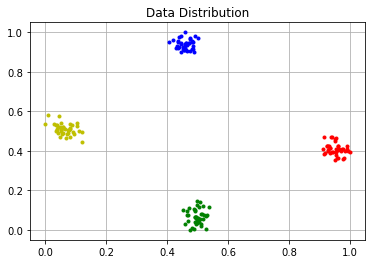

In [7]:
plt.title('Data Distribution')
plt.grid()
plt.axis(xlim=(0, 1), ylim=(0, 1), equal=True)
plt.plot(x[0, y[0, :] == 1], x[1, y[0, :] == 1], '.b')
plt.plot(x[0, y[1, :] == 1], x[1, y[1, :] == 1], '.r')
plt.plot(x[0, y[2, :] == 1], x[1, y[2, :] == 1], '.g')
plt.plot(x[0, y[3, :] == 1], x[1, y[3, :] == 1], '.y')
plt.show()

In [8]:
dim, samples = x.shape
print(dim, samples)

2 160


In [9]:
types, samples = y.shape
print(types, samples)

4 160


In [10]:
w = -1 + 2 * np.random.rand(types, dim)
w

array([[ 0.45294891, -0.41304937],
       [ 0.21202712, -0.91545892],
       [ 0.20208939, -0.77671995],
       [-0.68903634,  0.58183062]])

In [11]:
b = -1 + 2 * np.random.rand(types, 1)
b

array([[ 0.77957718],
       [-0.42283638],
       [-0.10707437],
       [-0.96648265]])

In [12]:
eta = .7
eta

0.7

In [13]:
w_res, b_res = one_layer_network(x=x,Y=y,w=w,b=b,eta=eta,p=samples)
w_res

array([[-0.43819778,  3.17889701],
       [ 3.50344472, -0.87396274],
       [-0.0394893 , -4.04085323],
       [-3.92615437,  0.41605863]])

In [14]:
b_res

array([[-2.29672159],
       [-2.37824877],
       [ 0.67469609],
       [ 0.42894665]])

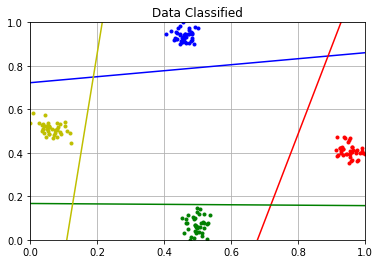

In [15]:
plt.title('Data Classified')
plt.grid()
plt.axis(xlim=(0, 1), ylim=(0, 1), equal=True)
plt.plot(x[0, y[0, :] == 1], x[1, y[0, :] == 1], '.b')
plt.plot(x[0, y[1, :] == 1], x[1, y[1, :] == 1], '.r')
plt.plot(x[0, y[2, :] == 1], x[1, y[2, :] == 1], '.g')
plt.plot(x[0, y[3, :] == 1], x[1, y[3, :] == 1], '.y')
plt.plot([0,1], 
         [- (w_res[0,0] / w_res[0,1]) * 0 - (b_res[0] / w_res[0,1]), - (w_res[0,0] / w_res[0,1]) * 1 - (b_res[0] / w_res[0,1])], '-b')
plt.plot([0,1], 
         [- (w_res[1,0] / w_res[1,1]) * 0 - (b_res[1] / w_res[1,1]), - (w_res[1,0] / w_res[1,1]) * 1 - (b_res[1] / w_res[1,1])], '-r')
plt.plot([0,1], 
         [- (w_res[2,0] / w_res[2,1]) * 0 - (b_res[2] / w_res[2,1]), - (w_res[2,0] / w_res[2,1]) * 1 - (b_res[2] / w_res[2,1])], '-g')
plt.plot([0,1], 
         [- (w_res[3,0] / w_res[3,1]) * 0 - (b_res[3] / w_res[3,1]), - (w_res[3,0] / w_res[3,1]) * 1 - (b_res[3] / w_res[3,1])], '-y')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()